In [1]:
import os,sys
os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)

import GWGen; from GWGen import WFGenerator
from GWGen.WFGenerator import *

from few.trajectory.inspiral import EMRIInspiral
from few.utils.utility import *

In [33]:
import astropy.units as unit
unit.yr.to(unit.s)

31557600.0

In [147]:
np.shape(z)

(1, 8)

In [454]:
dat

array([[33.5020202]])

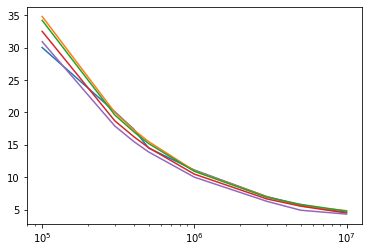

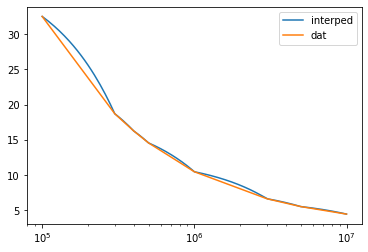

In [479]:
y = [1e5,3e5, 4e5, 5e5, 1e6,3e6,5e6,1e7]
x = [0.1,0.3,0.5,0.7,0.8]
z = [[30,  20.1,17.4,14.5, 11.1,    7.,   5.7, 4.6],
        [34.8, 20, 17.3, 15.5, 11, 6.97, 5.55, 4.83],
        [34.2, 19.6, 17, 15.2, 10.9, 6.9, 5.8, 4.76],
        [32.5, 18.7, 16.25, 14.56, 10.47, 6.64, 5.53, 4.46],
        [30.9, 17.9, 15.5, 13.9, 10.0, 6.27, 4.9, 4.3]]

[plt.semilogx(y,z[i]) for i in range(len(x))]
plt.show()

interp = spint.RectBivariateSpline(x,y,z,kx=1,ky=1,s=0)
domx = np.arange(1e5,1e7,1e4)
dat = interp(0.7,domx)
plt.semilogx(domx,dat[0],label="interped")
plt.semilogx(y, z[3], label="dat")
plt.legend()

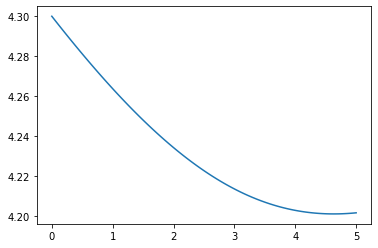

In [415]:
import matplotlib.pyplot as plt
M=1e7
e0=0.8
p0=4.3
traj = traj_module(M,mu,0.9,p0,e0,1., T=5, max_init_len=int(1e4))
plt.plot(traj[0]/31557600.0, traj[1])

In [127]:
get_separatrix(0.9,0.2,1.)

2.5007620045187737

In [128]:
def func(p,M,e0):
    traj = traj_module(M,mu,0.9,p,e0,1.,T=5, max_init_len=int(1e4))
    return traj[1][-1] - get_separatrix(0.9,e0,1.)

In [132]:
func(7.29,1e6,0.2)

0.00010212211297755402

In [130]:
sp.optimize.root(func, 15, args=(1e6,0.2))

    fjac: array([[-1.]])
     fun: 5.585081730430375e-09
 message: 'The solution converged.'
    nfev: 24
     qtf: array([-5.58508173e-09])
       r: array([428.69353472])
  status: 1
 success: True
       x: array([7.29628301])

In [55]:
traj_module = EMRIInspiral(func="pn5")

# set initial parameters
M = 1e5
mu = 1e1
e0 = 0.1

traj_args = [M, mu, 0.9, e0, 1.0]
traj_kwargs = {}
index_of_p = 3

t_out = 5
# run trajectory
p_new = get_p_at_t(
    traj_module,
    t_out,
    traj_args,
    index_of_p=3,
    index_of_a=2,
    index_of_e=4,
    index_of_x=5,
    traj_kwargs={"max_init_len":int(1e4)},
    xtol=2e-9,
    rtol=8.881784197001252e-12,
    bounds=None,
)

print(p_new)

ValueError: f(a) and f(b) must have different signs